# **ETUDE EXPLOIRATOIRE DES DONNEES**

##  Préparation de l'environnement

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Charger le dataset

In [6]:
file_path = "dataset/HAM10000_metadata.csv"
dataset = pd.read_csv(file_path)

In [7]:
dataset.head()  # Montre les 5 premières lignes
dataset.info()  # Donne des informations générales sur le dataset
dataset.describe()  # Résumé statistique des colonnes numériques

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lesion_id     10015 non-null  object 
 1   image_id      10015 non-null  object 
 2   dx            10015 non-null  object 
 3   dx_type       10015 non-null  object 
 4   age           9958 non-null   float64
 5   sex           10015 non-null  object 
 6   localization  10015 non-null  object 
dtypes: float64(1), object(6)
memory usage: 547.8+ KB


,age
count,9958.000000
mean,51.863828
std,16.968614
min,0.000000
25%,40.000000
50%,50.000000
75%,65.000000
max,85.000000


### Nettoyage des données

In [8]:
dataset.isnull().sum()


lesion_id        0
image_id         0
dx               0
dx_type          0
age             57
sex              0
localization     0
dtype: int64

In [9]:
mean_age = dataset['age'].mean()
# Remplacer les valeurs manquantes par la moyenne
dataset['age'] = dataset['age'].fillna(mean_age)

# Afficher un aperçu de la colonne age
print(dataset['age'].head())


0    80.0
1    80.0
2    80.0
3    80.0
4    75.0
Name: age, dtype: float64


In [10]:
# Compter les occurrences des valeurs dans la colonne dx
compte = dataset["dx"].value_counts()

print(compte)

dx
nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: count, dtype: int64


In [11]:
print(dataset['dx'].unique())
print(dataset['sex'].unique())
print(dataset['localization'].unique())


['bkl' 'nv' 'df' 'mel' 'vasc' 'bcc' 'akiec']
['male' 'female' 'unknown']
['scalp' 'ear' 'face' 'back' 'trunk' 'chest' 'upper extremity' 'abdomen'
 'unknown' 'lower extremity' 'genital' 'neck' 'hand' 'foot' 'acral']


## Compréhension et Exploration des Données

### Analyse de la distribution des classes dans dx

C:\Users\ludov\AppData\Local\Temp\ipykernel_23384\1104338135.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='dx', data=dataset, palette='Set2')


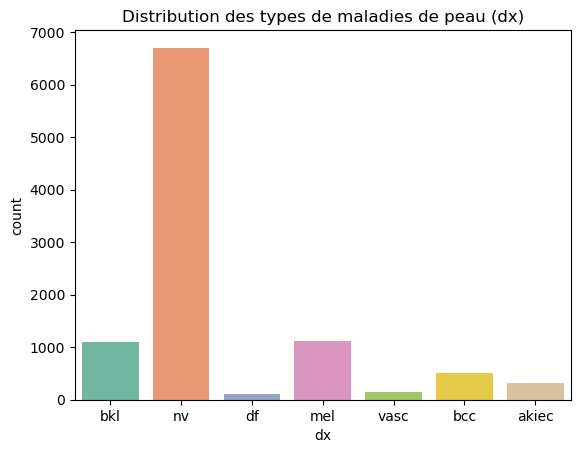

dx
nv       0.669496
mel      0.111133
bkl      0.109735
bcc      0.051323
akiec    0.032651
vasc     0.014179
df       0.011483
Name: proportion, dtype: float64


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution des classes
sns.countplot(x='dx', data=dataset, palette='Set2')
plt.title("Distribution des types de maladies de peau (dx)")
plt.show()

# Vérifier les proportions
print(dataset['dx'].value_counts(normalize=True))



### Analyse Bivariée

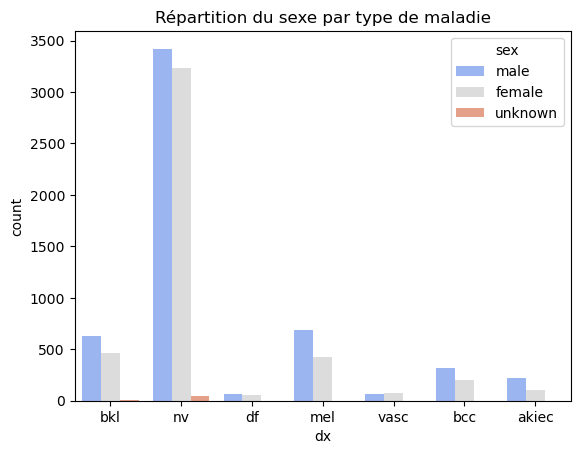

In [13]:
sns.countplot(x='dx', hue='sex', data=dataset, palette='coolwarm')
plt.title("Répartition du sexe par type de maladie")
plt.show()


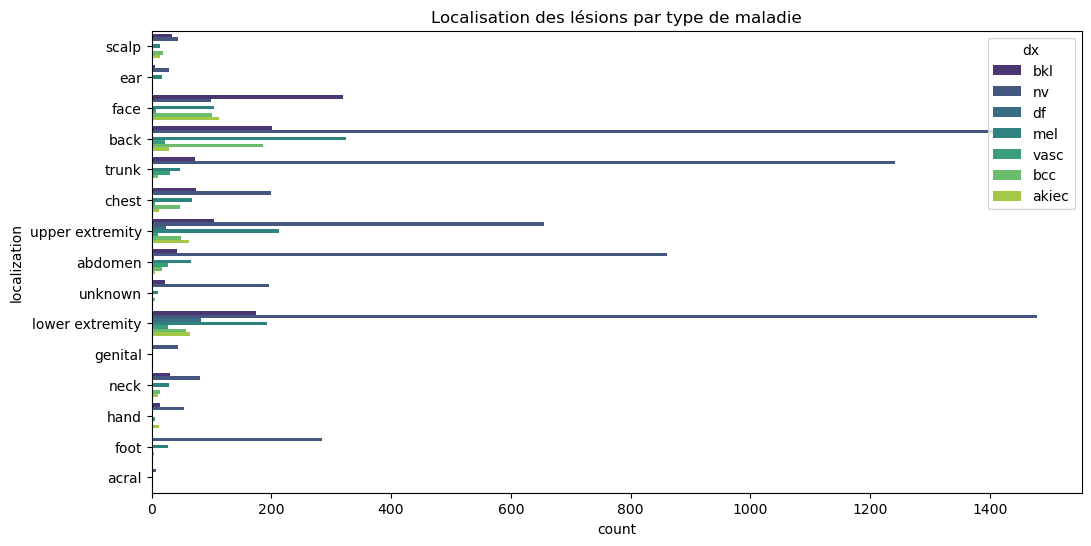

In [14]:
plt.figure(figsize=(12, 6))
sns.countplot(y='localization', hue='dx', data=dataset, palette='viridis')
plt.title("Localisation des lésions par type de maladie")
plt.show()


### Analyse Multivariée

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   dx                            10015 non-null  int32  
 1   dx_type                       10015 non-null  int32  
 2   age                           10015 non-null  float64
 3   sex_male                      10015 non-null  bool   
 4   sex_unknown                   10015 non-null  bool   
 5   localization_acral            10015 non-null  bool   
 6   localization_back             10015 non-null  bool   
 7   localization_chest            10015 non-null  bool   
 8   localization_ear              10015 non-null  bool   
 9   localization_face             10015 non-null  bool   
 10  localization_foot             10015 non-null  bool   
 11  localization_genital          10015 non-null  bool   
 12  localization_hand             10015 non-null  bool   
 13  l

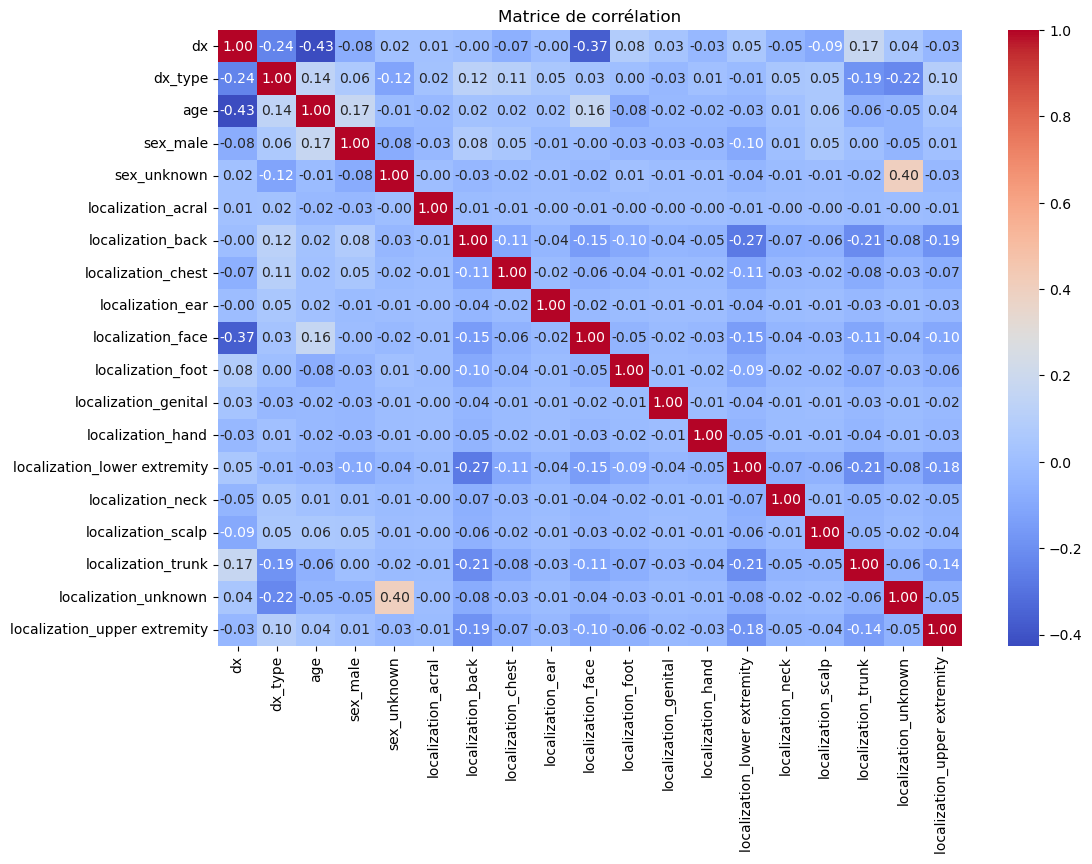

In [15]:
from sklearn.preprocessing import LabelEncoder


# Remplacer les valeurs manquantes dans 'age' par la moyenne
mean_age = dataset['age'].mean()
dataset['age'].fillna(mean_age)

# Encoder la colonne 'dx' avec Label Encoding
label_encoder = LabelEncoder()
dataset['dx'] = label_encoder.fit_transform(dataset['dx'])

# Encoder la colonne 'dx_type' avec Label Encoding
dataset['dx_type'] = label_encoder.fit_transform(dataset['dx_type'])

# Encoder les colonnes 'sex' et 'localization' avec One-Hot Encoding
data_encoded = pd.get_dummies(dataset, columns=['sex', 'localization'], drop_first=True)

# Supprimer les colonnes non pertinentes
data_encoded = data_encoded.drop(columns=['lesion_id', 'image_id'])

# Vérifier les types des colonnes
print(data_encoded.info())

# Calculer la matrice de corrélation
corr = data_encoded.corr()

# Afficher la matrice de corrélation
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Matrice de corrélation")
plt.show()




In [16]:
print(dataset['dx'].head(2550))


0       2
1       2
2       2
3       2
4       2
       ..
2545    1
2546    1
2547    1
2548    1
2549    1
Name: dx, Length: 2550, dtype: int32


# **ETUDE DE LA RELATION ENTRE LA MALADIE BCC DE LA COLONNE DX ET LES AUTRE VARIABLE**

## Filtre  les données pour bcc

In [18]:
# le chemin de votre fichier
file_path = "dataset/HAM10000_metadata.csv"
dataset = pd.read_csv(file_path)
bcc_data = dataset[dataset['dx'] == 'bcc']
print(bcc_data.head())

        lesion_id      image_id   dx dx_type   age     sex localization
2462  HAM_0000781  ISIC_0028155  bcc   histo  50.0    male         back
2463  HAM_0003220  ISIC_0034093  bcc   histo  80.0  female         face
2464  HAM_0007141  ISIC_0029230  bcc   histo  50.0    male        trunk
2465  HAM_0007141  ISIC_0031513  bcc   histo  50.0    male        trunk
2466  HAM_0007009  ISIC_0032384  bcc   histo  50.0    male         back


## ÉtudE de la  répartition des autres variables

C:\Users\ludov\AppData\Local\Temp\ipykernel_23384\3641788258.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sex', data=bcc_data, palette='Set2')


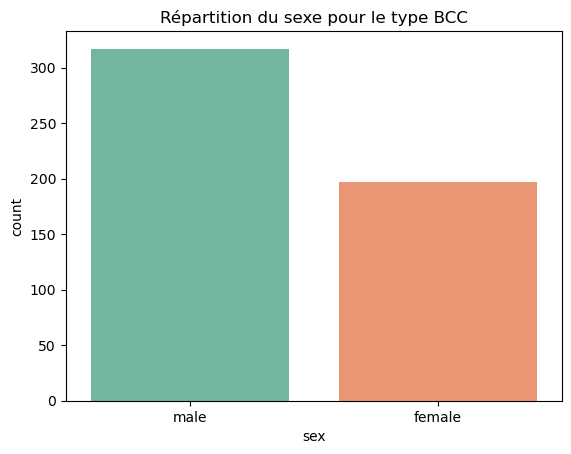

In [19]:
sns.countplot(x='sex', data=bcc_data, palette='Set2')
plt.title("Répartition du sexe pour le type BCC")
plt.show()


C:\Users\ludov\AppData\Local\Temp\ipykernel_23384\2631826620.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='localization', data=bcc_data, palette='Set3')


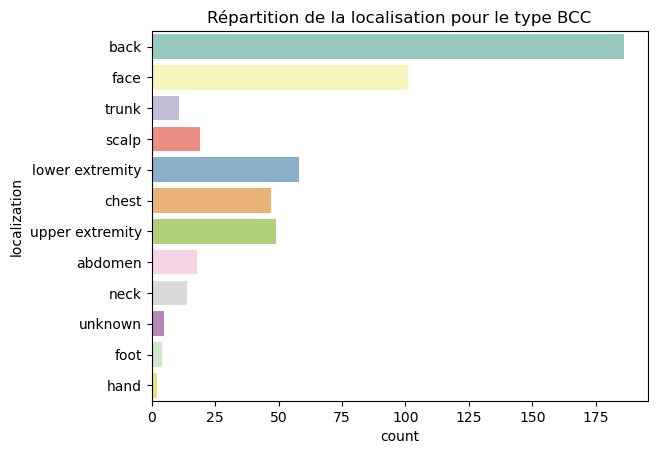

In [20]:
sns.countplot(y='localization', data=bcc_data, palette='Set3')
plt.title("Répartition de la localisation pour le type BCC")
plt.show()


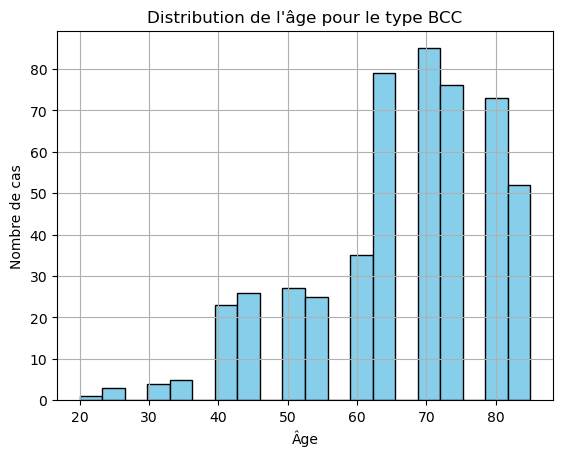

In [21]:
bcc_data['age'].hist(bins=20, color='skyblue', edgecolor='black')
plt.title("Distribution de l'âge pour le type BCC")
plt.xlabel("Âge")
plt.ylabel("Nombre de cas")
plt.show()


## test du chi²

In [22]:
from scipy.stats import chi2_contingency
# Création de la colonne is_bcc
dataset['is_bcc'] = (dataset['dx'] == 'bcc').astype(int)
contingency_table = pd.crosstab(dataset['is_bcc'], dataset['sex'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi2: {chi2}, p-value: {p}")


Chi2: 15.077201335541197, p-value: 0.0005321417441328211


In [23]:
from scipy.stats import ttest_ind

bcc_ages = dataset[dataset['is_bcc'] == 1]['age']
non_bcc_ages = dataset[dataset['is_bcc'] == 0]['age']

t_stat, p_value = ttest_ind(bcc_ages, non_bcc_ages, nan_policy='omit')
print(f"T-statistic: {t_stat}, p-value: {p_value}")


T-statistic: 20.97928081496913, p-value: 1.1688162644178754e-95


## Visualisation globale

C:\Users\ludov\AppData\Local\Temp\ipykernel_23384\3282599022.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='is_bcc', y='age', data=dataset, palette='Set2')


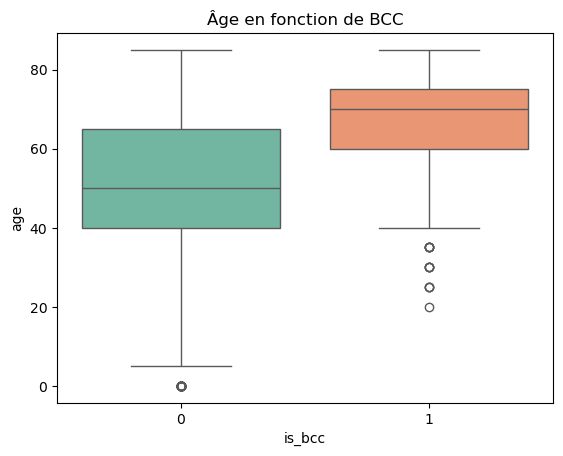

In [24]:
sns.boxplot(x='is_bcc', y='age', data=dataset, palette='Set2')
plt.title("Âge en fonction de BCC")
plt.show()


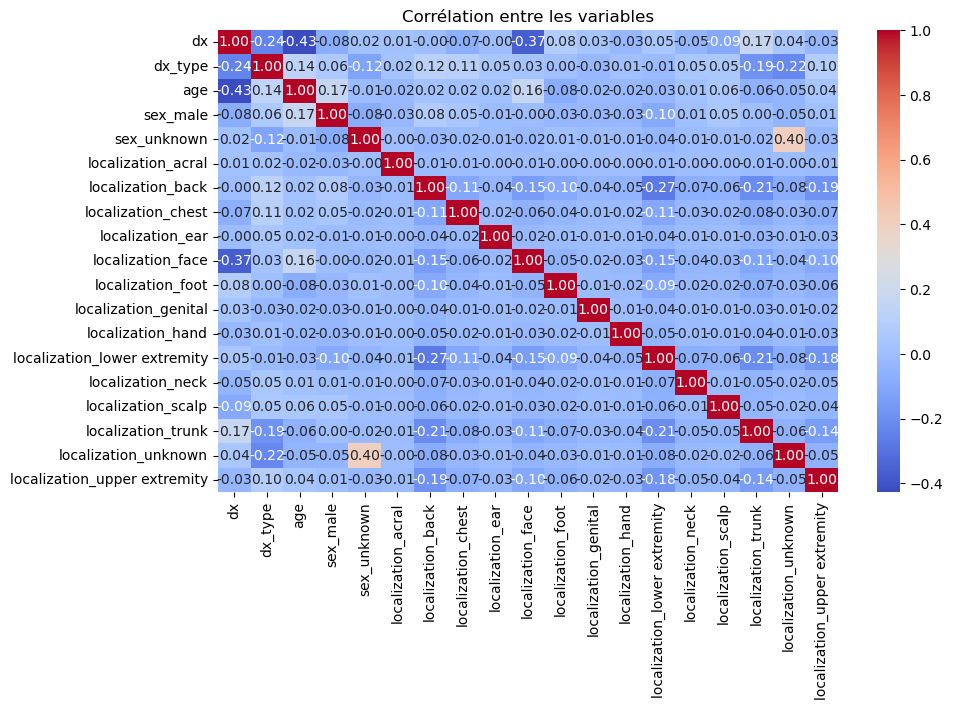

In [25]:
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Corrélation entre les variables")
plt.show()


# **CREATION DU NOVEAU JEU DE DONNER**

In [27]:

import pandas as pd

data_encoded['is_bcc'] = (dataset['dx'] == 'bcc').astype(int)

# Liste des chemins des fichiers CSV
file_paths = {
    '8L': 'dataset/hmnist_8_8_L.csv',
    '8RGB': 'dataset/hmnist_8_8_RGB.csv',
    '28L': 'dataset/hmnist_28_28_L.csv',
    '28RGB': 'dataset/hmnist_28_28_RGB.csv'
}

# Charger les datasets
datasets = {key: pd.read_csv(path) for key, path in file_paths.items()}

# Colonnes supplémentaires à ajouter
additional_columns = [
    'age', 'localization_acral', 'localization_back', 'is_bcc',
    'localization_chest', 'localization_ear', 'localization_face',
    'localization_foot', 'localization_genital', 'localization_hand',
    'localization_lower extremity', 'localization_neck', 
    'localization_scalp', 'localization_trunk', 
    'localization_unknown', 'localization_upper extremity'
]

# Vérifier et ajouter les colonnes supplémentaires
# Supposons que 'data_encoded' contient les colonnes à ajouter
# Ajoutez les colonnes manquantes dans les datasets
missing_columns = [col for col in additional_columns if col not in data_encoded.columns]
if missing_columns:
    print(f"Les colonnes suivantes sont manquantes dans le dataset source : {missing_columns}")
else:
    # Fonction pour ajouter les colonnes et convertir les booléens
    def process_dataset(dataset, additional_columns, bool_columns):
        dataset = pd.concat([dataset, data_encoded[additional_columns].reset_index(drop=True)], axis=1)
        dataset[bool_columns] = dataset[bool_columns].astype(int)
        return dataset

    # Liste des colonnes booléennes à encoder
    bool_columns = [
        'localization_acral', 'localization_back', 'is_bcc', 'localization_chest', 
        'localization_ear', 'localization_face', 'localization_foot', 
        'localization_genital', 'localization_hand', 'localization_lower extremity',
        'localization_neck', 'localization_scalp', 'localization_trunk',
        'localization_unknown', 'localization_upper extremity'
    ]

    # Appliquer la fonction de traitement à tous les datasets
    for key, dataset in datasets.items():
        datasets[key] = process_dataset(dataset, additional_columns, bool_columns)
        output_file = f"dataset/Meta_Data_Processed_{key}.csv"
        datasets[key].to_csv(output_file, index=False)
        print(f"Fichier traité et sauvegardé : {output_file}")


Fichier traité et sauvegardé : dataset/Meta_Data_Processed_8L.csv
Fichier traité et sauvegardé : dataset/Meta_Data_Processed_8RGB.csv
Fichier traité et sauvegardé : dataset/Meta_Data_Processed_28L.csv
Fichier traité et sauvegardé : dataset/Meta_Data_Processed_28RGB.csv
